In [123]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import time
import json

# import pandas 
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import datetime
import datetime


In [2]:
# create executable path
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [3]:
time.sleep(3)

In [4]:
table = soup(browser.html, 'html.parser').find('table', class_='table')

In [5]:
browser.quit()

In [114]:
data = []
header = table.find_all('th')
rows = table.find_all('tr')
del rows[0]

# populate data dictionary
for j in range(len(rows)):
    # assign row
    row = rows[j].find_all('td')
    # initialize dictionary to store row data
    row_dict={}

    # populate dictionary for row data
    for i in range(len(header)):
        key = header[i].text
        value = row[i].text
        row_dict[key]=value
    data.append(row_dict)

df=pd.DataFrame(data)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [125]:
# change data types
df=df.astype({'id':int, 'sol':int, 'ls':int,'month':int,'min_temp':float,'pressure':float})
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'],format='%y%m%d')
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [134]:
print(f'There are {len(df["month"].unique())} months on Mars.')

There are 12 months on Mars.


In [220]:
print(f'There are {len(df["sol"].unique())} dates observed in the dataset.')

There are 1867 dates observed in the dataset.


(-95.0, -70.0)

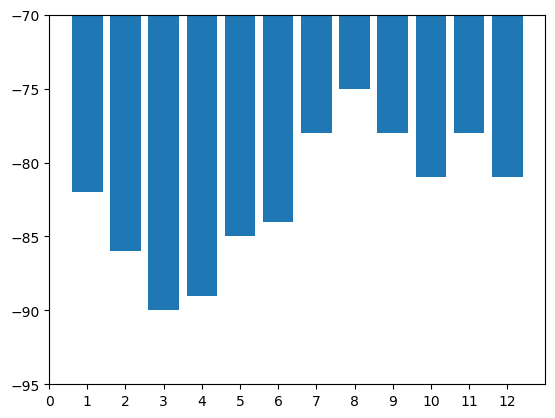

In [216]:
plt.bar(df['month'],df['min_temp'])
plt.xticks(range(13))
plt.ylim(-95,-70)

The third month on Mars is the coldest. The eigth month on Mars is the warmest

(700.0, 950.0)

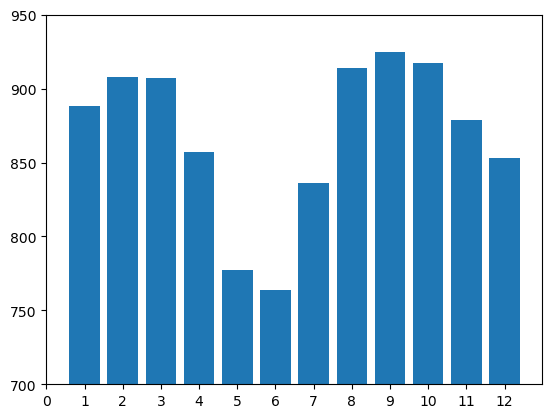

In [218]:
# df[['month','pressure']].groupby(['month']).mean()
plt.bar(df['month'],df['pressure'])
plt.xticks(range(13))
plt.ylim(700,950)

The sixth month on Mars has the lowest pressure. The ninth month on Mars has the highest pressure

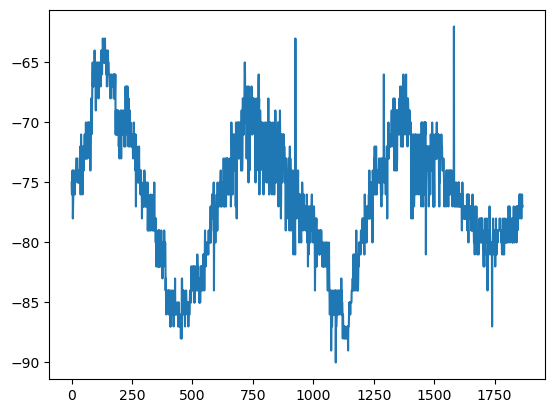

In [219]:
plt.plot(df['min_temp'])

On the chart, it appears to take about 650 days to complete one sine cycle (days 0 to about 650, 650 to about 1300)